In [1]:
import numpy as np
import matplotlib.pyplot as plt 

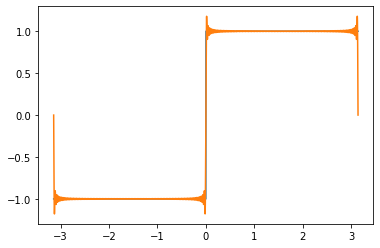

In [2]:
def partial_sum(t, n):
    p_sum = 0
    for k in range(1, n+1):
        p_sum += (4 / np.pi) * np.sin((2*k - 1) * t) / (2*k - 1)
    
    return p_sum

def clk(t):
    if t >= 0:
        return 1
    else:
        return -1

np_clk = np.vectorize(clk)

t = np.linspace(-np.pi, np.pi, 10000)
x = np_clk(t)
s = partial_sum(t, 100)

plt.plot(t, x)
plt.plot(t, s)

In [3]:
import sympy

t = sympy.Symbol('t')

for j in range(6):
    print(sympy.legendre(j, t))

1
t
3*t**2/2 - 1/2
5*t**3/2 - 3*t/2
35*t**4/8 - 15*t**2/4 + 3/8
63*t**5/8 - 35*t**3/4 + 15*t/8


Text(0, 0.5, 'Signal and patial sum')

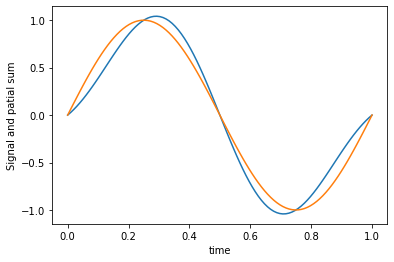

In [4]:
# Sampling therem experiment
fs = 4 # サンプリング周波数（ナイキスト周波数の2倍）
time = np.linspace(0, 1, 100)


def SF(time):
    ps = 0
    t = np.linspace(0, 1, fs+1)

    for k in range(0, len(t)):
        ps += np.sin(2*np.pi*t[k]) * np.sinc(fs*(time-t[k]))
    
    return ps


plt.plot(time, SF(time))
plt.plot(time, np.sin(2*np.pi*time))
plt.xlabel("time")
plt.ylabel("Signal and patial sum")

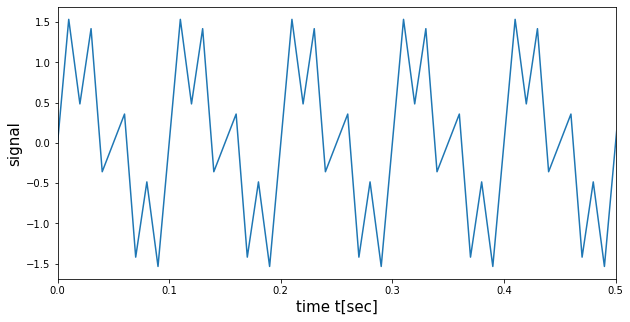

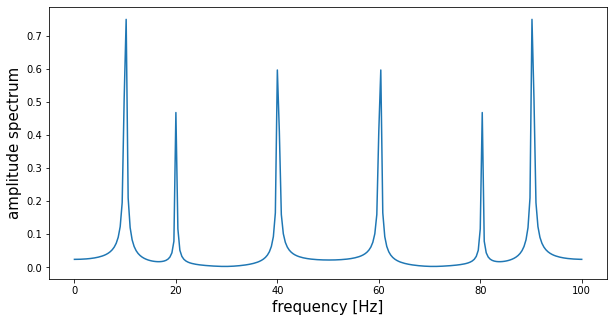

In [25]:
# FFTで周波数情報を取り出してみる
N = 2**8 # number of sample points
fs = 100
T = 1 / fs
PI = np.pi

f1 = 10; f2 = 20; f3 = 40 # frequency [Hz]
A1 = 1; A2 = 0.5; A3 = 0.8 # Amplitude 

t = np.arange(0, N*T, T)
x = A1 * np.sin(2 * PI * f1 * t) + A2 * np.sin(2 * PI * f2 * t) + A3 * np.sin(2 * PI * f3 * t)

fig = plt.figure(figsize=(10, 5))
plt.xlabel("time t[sec]", fontsize=15)
plt.ylabel("signal", fontsize=15)
plt.xlim(0, 0.5)
plt.plot(t, x)

# FFT
F = np.fft.fft(x)

amp = 2 * np.abs(F) / N
freq = np.linspace(0, fs, N)

fig = plt.figure(figsize=(10, 5))
plt.xlabel("frequency [Hz]", fontsize=15)
plt.ylabel("amplitude spectrum", fontsize=15)
plt.plot(freq, amp)




上の例では50Hzを境に対称になっている　-> ナイキスト周波数より先はいらないことがわかる. 今回の場合は $fs = 100$ よりナイキスト周波数は50  
それ以上の周波数が含まれているとサンプリング周波数で折り返されたところに周波数が出現する（**エリアシング**）

In [20]:
x.shape

(256,)

In [21]:
t.shape

(256,)

In [22]:
N, T

(256, 0.01)

In [23]:
F.shape

(256,)